<a href="https://colab.research.google.com/github/anjali-ojha/deep-learning/blob/main/assignment/assignment-4/part2/Anjali_Ojha_HW_4_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 04 - Transfer Learning and Bounding Boxes and YOLOV8

# Part 2: Follow the steps in YOLOV8 and attach a screenshot of object detection

## Mac: https://pysource.com/2023/03/28/object-detection-with-yolo-v8-on-mac-m1/ buttery fly dataset: use ~10 images from https://universe.roboflow.com/yolo-a6y21/squid-bat-butterfly

## You can also try butterfly video and detect objects. (do not submit it)

In [1]:
!pip install ultralytics

In [2]:
from ultralytics import YOLO
import numpy as np
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy
import cv2

from IPython.display import display
from IPython.display import Image as im

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
def detect_objects(_model, image_path, conf):
    """
    This method will load the image and detect the
    """
    image = Image.open(image_path)
    frame = cv2.cvtColor(numpy.array(image), cv2.COLOR_RGB2BGR)
    results = _model.predict(source=image_path, conf=conf)
    result = results[0]
    print(results[0].boxes.xyxy)
    bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")
    classes = np.array(result.boxes.cls.cpu(), dtype="int")
    # class_labels = ['Bat', 'Butterfly', 'Squid']

    print(bboxes, classes)

    for cls, bbox in zip(classes, bboxes):
        (x, y, x2, y2) = bbox
        cv2.rectangle(frame, (x, y), (x2, y2), (0, 0, 225), 2)
        cv2.putText(frame, str(cls), (x, y - 5), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 225), 2)

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    image2 = Image.fromarray(frame_rgb)
    plt.figure(figsize=(8,32))
    plt.imshow(image2)
    plt.show()


In [5]:
# Load Test Image for quick validation
! rm dog.jpeg*
! wget https://media.roboflow.com/notebooks/examples/dog.jpeg

--2024-02-29 03:47:02--  https://media.roboflow.com/notebooks/examples/dog.jpeg
Resolving media.roboflow.com (media.roboflow.com)... 34.110.133.209
Connecting to media.roboflow.com (media.roboflow.com)|34.110.133.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106055 (104K) [image/jpeg]
Saving to: ‘dog.jpeg’

dog.jpeg            100%[===================>] 103.57K  --.-KB/s    in 0.001s  

2024-02-29 03:47:02 (89.8 MB/s) - ‘dog.jpeg’ saved [106055/106055]




image 1/1 /content/dog.jpeg: 640x384 1 dog, 1702.2ms
Speed: 12.8ms preprocess, 1702.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)
tensor([[ 68.5242, 249.5817, 644.2305, 929.1172]])
[[ 68 249 644 929]] [16]


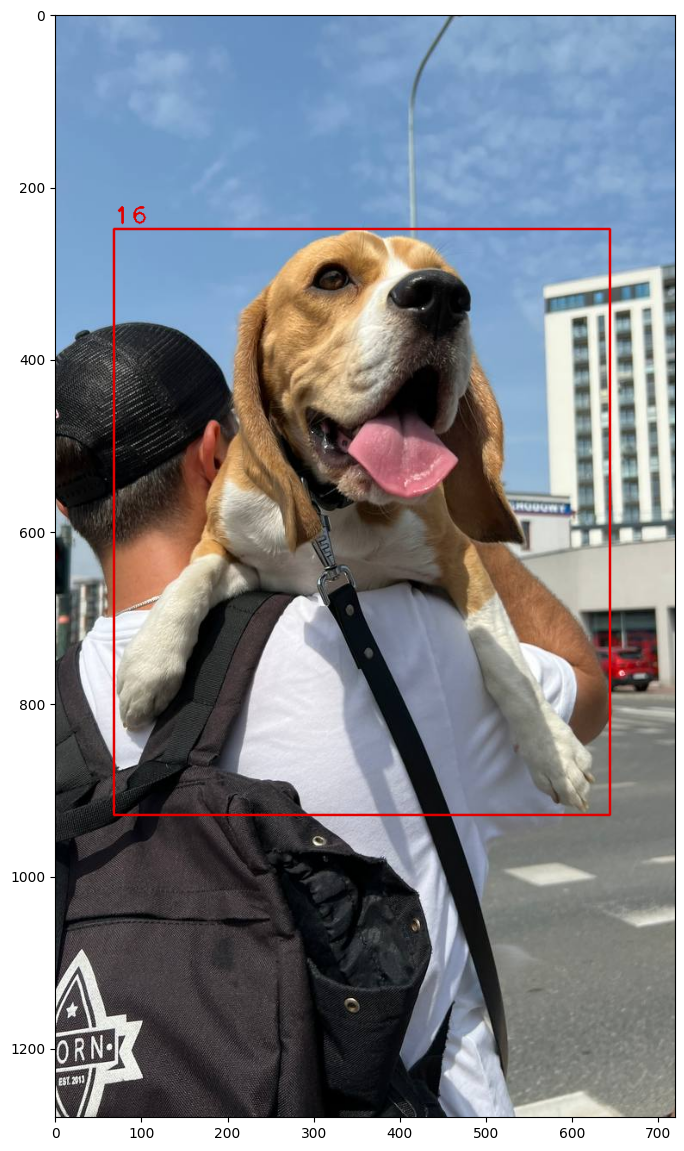

In [6]:
# Loading the ylolv8m model and testing it on a sample image.
model = YOLO("yolov8m.pt")
detect_objects(model, 'dog.jpeg', conf=0.75)

## Loading the sample dataset which created from the source https://universe.roboflow.com/yolo-a6y21/squid-bat-butterfly

### Took the entire dataset and split it in test and validatiion. It consist of multiple images of Bats, Butterfly and Squid.

In [7]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [14]:
# Loading Data From Git which was prepared from the given link

! rm -r butterfly-mix* __MAC*
! ls -lrth
! wget https://github.com/anjali-ojha/deep-learning/raw/main/assignment/assignment-4/part2/butterfly-mix.zip
! unzip butterfly-mix.zip
! ls -lrth

total 57M
-rw-r--r-- 1 root root 104K Jun  2  2023 dog.jpeg
drwxr-xr-x 1 root root 4.0K Feb 27 14:34 sample_data
-rw-r--r-- 1 root root  50M Feb 29 03:34 yolov8m.pt
-rw-r--r-- 1 root root 6.3M Feb 29 03:35 yolov8n.pt
drwxr-xr-x 3 root root 4.0K Feb 29 03:56 runs
--2024-02-29 04:06:34--  https://github.com/anjali-ojha/deep-learning/raw/main/assignment/assignment-4/part2/butterfly-mix.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/anjali-ojha/deep-learning/main/assignment/assignment-4/part2/butterfly-mix.zip [following]
--2024-02-29 04:06:35--  https://raw.githubusercontent.com/anjali-ojha/deep-learning/main/assignment/assignment-4/part2/butterfly-mix.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (

In [11]:
!pwd

/content


In [13]:
! rm -rf runs/*
! ls -lrt
! path='/content'
! yolo mode=train task=detect model=yolov8n.pt data=$path/butterfly-mix/datasets/data.yaml epochs=25 imgsz=640 plots=True


Process is terminated.


In [ ]:
im(filename='runs/detect/train/results.png', width=900)

In [26]:
def detect_objects(_model, image_path, conf):
    """
    This method will load the image and detect the
    """
    image = Image.open(image_path)
    frame = cv2.cvtColor(numpy.array(image), cv2.COLOR_RGB2BGR)
    results = _model.predict(source=image_path, conf=conf)
    result = results[0]

    bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")
    classes = np.array(result.boxes.cls.cpu(), dtype="int")
    class_labels = ['Bat', 'Butterfly', 'Squid']

    print(bboxes, classes)
    title = []
    for cls, bbox in zip(classes, bboxes):
        (x, y, x2, y2) = bbox
        cv2.rectangle(frame, (x, y), (x2, y2), (0, 0, 225), 2)
        cv2.putText(frame, str(class_labels[cls]), (x, y - 5), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 225), 2)

        title.append(class_labels[cls])

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    image2 = Image.fromarray(frame_rgb)
    plt.figure(figsize=(8,8))
    plt.title(",".join(title))
    plt.imshow(image2)
    plt.show()


In [15]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
new_model = YOLO(f'{HOME}runs/detect/train/weights/best.pt')
detect_objects(new_model,
               image_path = 'butterfly-mix/datasets/test/images/11_jpg.rf.f6ba886248d16e5d94a21da899d988a7.jpg',
               conf = 0.007)



In [ ]:
import os

for filename in sorted(os.listdir('butterfly-mix/datasets/test/images/')):
    print(filename)
    if filename.startswith("."): continue
    detect_objects(new_model,
               image_path = f'butterfly-mix/datasets/test/images/{filename}',
               conf = 0.007)

In [16]:
new_model2 = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
train_result = new_model2.train(
    data = f'{HOME}/butterfly-mix/datasets/data.yaml',
    epochs=25
)


Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/butterfly-mix/datasets/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

train: Scanning /content/butterfly-mix/datasets/train/labels... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<00:00, 2395.52it/s]

train: New cache created: /content/butterfly-mix/datasets/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/butterfly-mix/datasets/valid/labels... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<00:00, 1149.23it/s]

val: New cache created: /content/butterfly-mix/datasets/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         0G      1.311      3.182      1.735         25        640: 100%|██████████| 6/6 [01:15<00:00, 12.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.28s/it]

                   all          9          9    0.00343          1      0.109     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25         0G      1.078      2.947       1.53         25        640: 100%|██████████| 6/6 [01:05<00:00, 10.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]

                   all          9          9    0.00355          1      0.413      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25         0G      1.092      2.547       1.54         34        640: 100%|██████████| 6/6 [01:01<00:00, 10.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]

                   all          9          9      0.004          1      0.402      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25         0G      1.121      2.269      1.596         19        640: 100%|██████████| 6/6 [01:01<00:00, 10.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]

                   all          9          9    0.00448          1      0.523      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25         0G     0.9996      2.093      1.474         25        640: 100%|██████████| 6/6 [01:04<00:00, 10.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.20s/it]

                   all          9          9    0.00491          1      0.586      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25         0G      1.046      1.955      1.498         25        640: 100%|██████████| 6/6 [01:08<00:00, 11.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]

                   all          9          9      0.638      0.277      0.758       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25         0G      1.003      1.843       1.44         24        640: 100%|██████████| 6/6 [01:10<00:00, 11.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]

                   all          9          9      0.816      0.333       0.71      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25         0G     0.9446      1.671      1.394         23        640: 100%|██████████| 6/6 [01:02<00:00, 10.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.20s/it]

                   all          9          9      0.702      0.888      0.818      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25         0G      1.022       1.82      1.493         13        640: 100%|██████████| 6/6 [01:02<00:00, 10.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]

                   all          9          9      0.593      0.889      0.765      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25         0G     0.9723      1.614        1.4         26        640: 100%|██████████| 6/6 [01:02<00:00, 10.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]

                   all          9          9      0.845      0.578      0.835      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25         0G     0.9304      1.485        1.4         17        640: 100%|██████████| 6/6 [01:01<00:00, 10.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]

                   all          9          9      0.451      0.667       0.78      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25         0G     0.8882      1.562      1.394         19        640: 100%|██████████| 6/6 [01:05<00:00, 10.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]

                   all          9          9      0.842       0.65      0.968      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25         0G     0.9481       1.37      1.381         32        640: 100%|██████████| 6/6 [01:04<00:00, 10.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]

                   all          9          9      0.859      0.667      0.885       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25         0G     0.9322      1.487      1.403         18        640: 100%|██████████| 6/6 [01:04<00:00, 10.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]

                   all          9          9      0.956       0.64      0.951      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25         0G     0.8416      1.381      1.335         25        640: 100%|██████████| 6/6 [01:02<00:00, 10.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]

                   all          9          9      0.953      0.667       0.94      0.619


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25         0G     0.6915      1.711      1.318          7        640: 100%|██████████| 6/6 [01:11<00:00, 11.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]

                   all          9          9      0.884      0.865      0.951      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25         0G     0.8148      1.745      1.464          7        640: 100%|██████████| 6/6 [01:05<00:00, 10.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]

                   all          9          9      0.841          1       0.94      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25         0G     0.7888       1.73       1.46          7        640: 100%|██████████| 6/6 [01:03<00:00, 10.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]

                   all          9          9      0.875      0.887      0.926      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25         0G     0.7487      1.557      1.398          8        640: 100%|██████████| 6/6 [01:08<00:00, 11.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]

                   all          9          9      0.939      0.889      0.932      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25         0G     0.7247      1.514      1.329          8        640: 100%|██████████| 6/6 [01:06<00:00, 11.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]

                   all          9          9      0.802      0.882      0.918      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25         0G     0.6765      1.506      1.338          7        640: 100%|██████████| 6/6 [01:07<00:00, 11.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]

                   all          9          9      0.852      0.872      0.932      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25         0G     0.6595      1.374      1.321          8        640: 100%|██████████| 6/6 [01:05<00:00, 10.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]

                   all          9          9      0.859          1      0.995      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25         0G     0.7237      1.426      1.323         10        640: 100%|██████████| 6/6 [01:15<00:00, 12.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]

                   all          9          9      0.875          1      0.995      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25         0G     0.6603       1.35       1.27          9        640: 100%|██████████| 6/6 [01:03<00:00, 10.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]

                   all          9          9      0.927          1      0.995      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25         0G     0.5839      1.273      1.172         11        640: 100%|██████████| 6/6 [01:03<00:00, 10.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]

                   all          9          9      0.949          1      0.995      0.833



25 epochs completed in 0.478 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


                   all          9          9      0.949          1      0.995      0.833
                   Bat          9          3       0.99          1      0.995      0.852
             Butterfly          9          3      0.903          1      0.995      0.752
                 Squid          9          3      0.952          1      0.995      0.895
Speed: 2.2ms preprocess, 198.4ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ccf42af7700>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

.DS_Store
01_jpg.rf.c8e5235634922823096ea135138c7d7f.jpg

image 1/1 /content/butterfly-mix/datasets/valid/images/01_jpg.rf.c8e5235634922823096ea135138c7d7f.jpg: 640x640 1 Butterfly, 604.5ms
Speed: 13.5ms preprocess, 604.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
[[ 48   0 380 383]] [1]


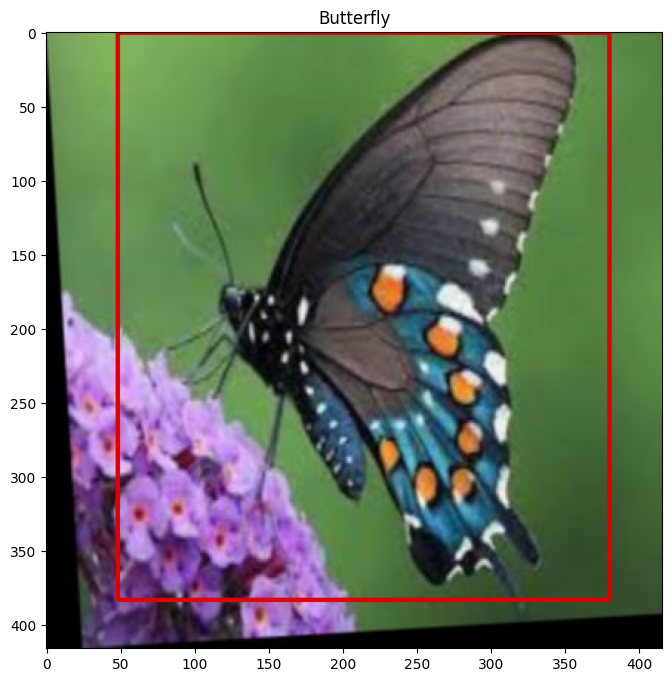

02_jpg.rf.d2830ef286eb4571acb72540cd1b41b9.jpg

image 1/1 /content/butterfly-mix/datasets/valid/images/02_jpg.rf.d2830ef286eb4571acb72540cd1b41b9.jpg: 640x640 1 Butterfly, 223.0ms
Speed: 5.0ms preprocess, 223.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
[[ 26  25 363 293]] [1]


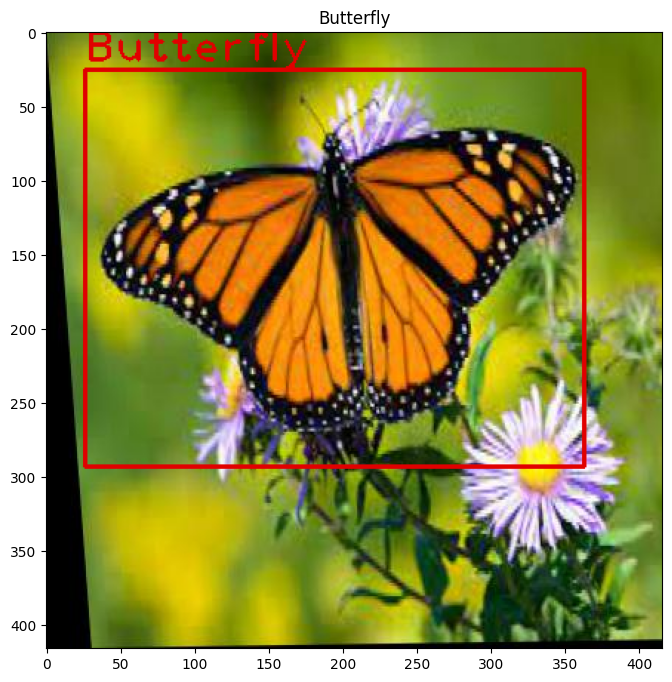

03_jpg.rf.daaf455c280f3e4c03f623dd456c3225.jpg

image 1/1 /content/butterfly-mix/datasets/valid/images/03_jpg.rf.daaf455c280f3e4c03f623dd456c3225.jpg: 640x640 1 Butterfly, 264.3ms
Speed: 5.7ms preprocess, 264.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
[[ 83   6 414 357]] [1]


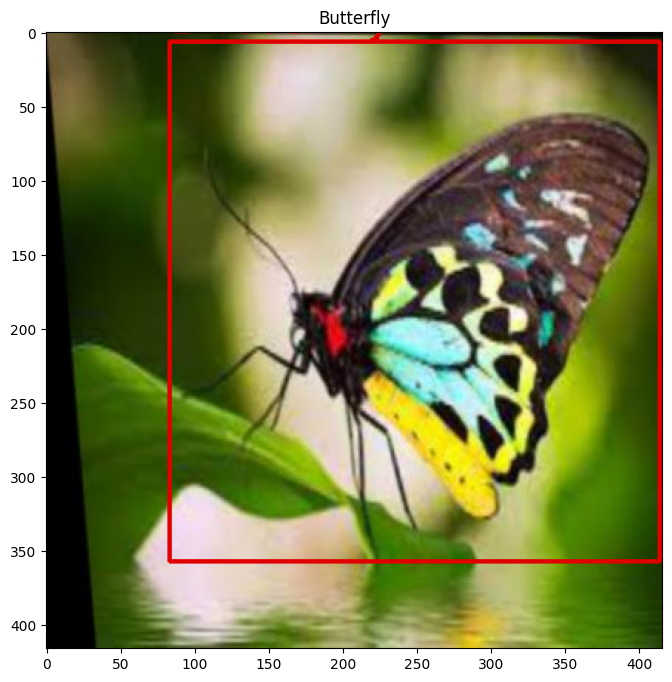

31_jpg.rf.ef5f6bedb9ffcb14a41887ebead5af0e.jpg

image 1/1 /content/butterfly-mix/datasets/valid/images/31_jpg.rf.ef5f6bedb9ffcb14a41887ebead5af0e.jpg: 640x640 1 Bat, 241.3ms
Speed: 4.5ms preprocess, 241.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
[[ 41  48 374 383]] [0]


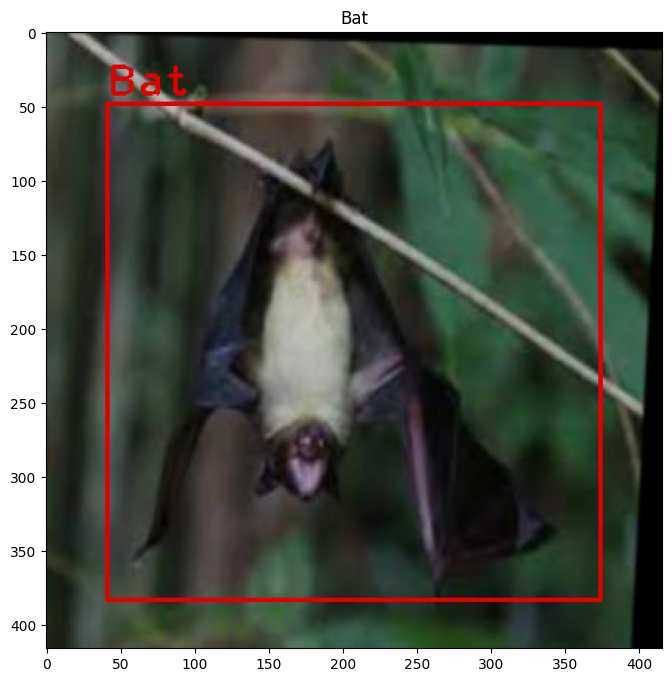

33_jpg.rf.eee27ca35a92325dfc7ffe902949d036.jpg

image 1/1 /content/butterfly-mix/datasets/valid/images/33_jpg.rf.eee27ca35a92325dfc7ffe902949d036.jpg: 640x640 1 Bat, 254.0ms
Speed: 4.9ms preprocess, 254.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
[[  1   7 307 409]] [0]


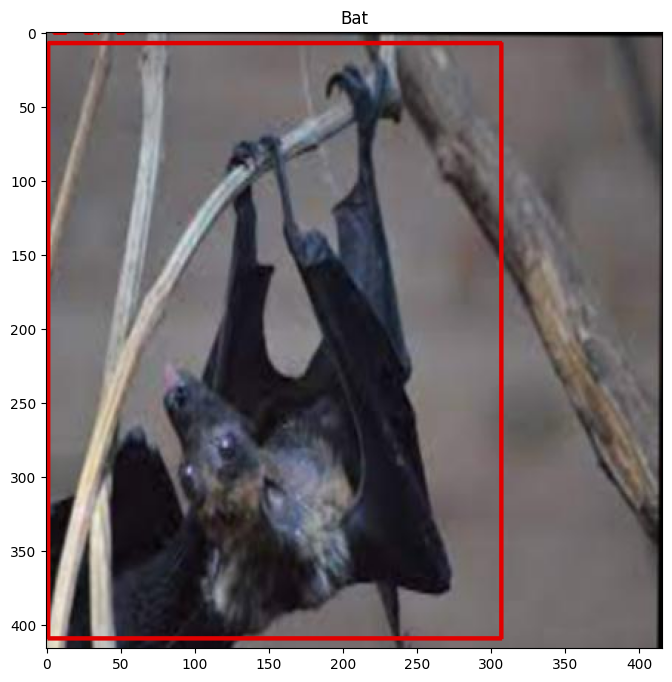

35_jpg.rf.b1716f5901bae2660166b50adbafcbcd.jpg

image 1/1 /content/butterfly-mix/datasets/valid/images/35_jpg.rf.b1716f5901bae2660166b50adbafcbcd.jpg: 640x640 1 Bat, 307.7ms
Speed: 5.4ms preprocess, 307.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
[[  8   0 416 416]] [0]


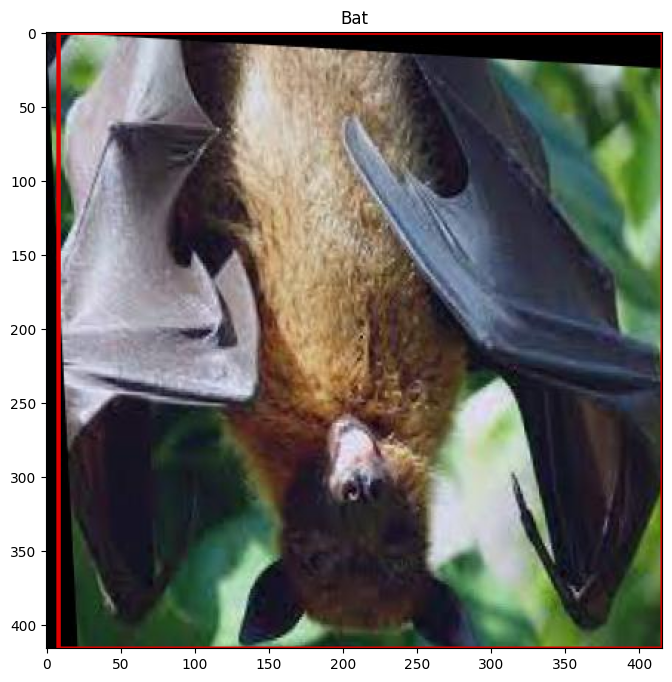

53_jpg.rf.b44f33562ad12e6b360039d8af663845.jpg

image 1/1 /content/butterfly-mix/datasets/valid/images/53_jpg.rf.b44f33562ad12e6b360039d8af663845.jpg: 640x640 1 Squid, 309.9ms
Speed: 7.9ms preprocess, 309.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
[[ 59  10 366 416]] [2]


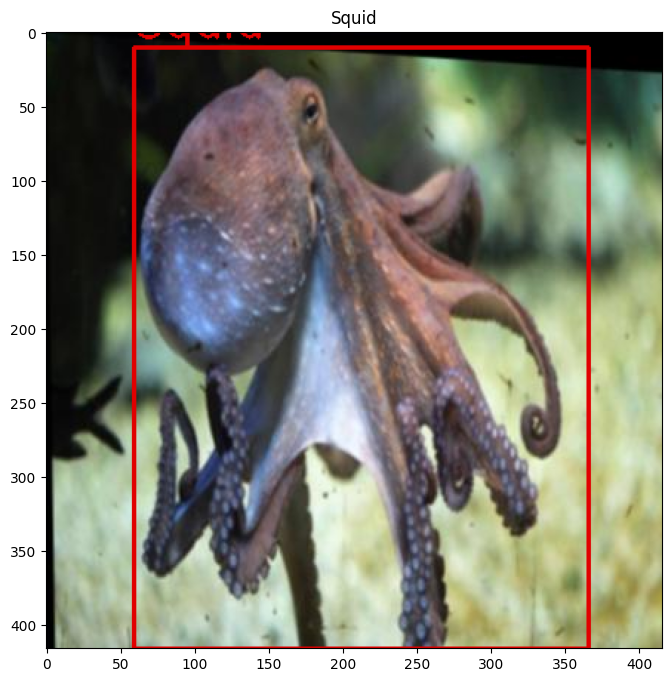

54_jpg.rf.d8bf72081286b342e575cdb0e0b468d7.jpg

image 1/1 /content/butterfly-mix/datasets/valid/images/54_jpg.rf.d8bf72081286b342e575cdb0e0b468d7.jpg: 640x640 1 Squid, 322.2ms
Speed: 5.1ms preprocess, 322.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
[[ 83  53 395 347]] [2]


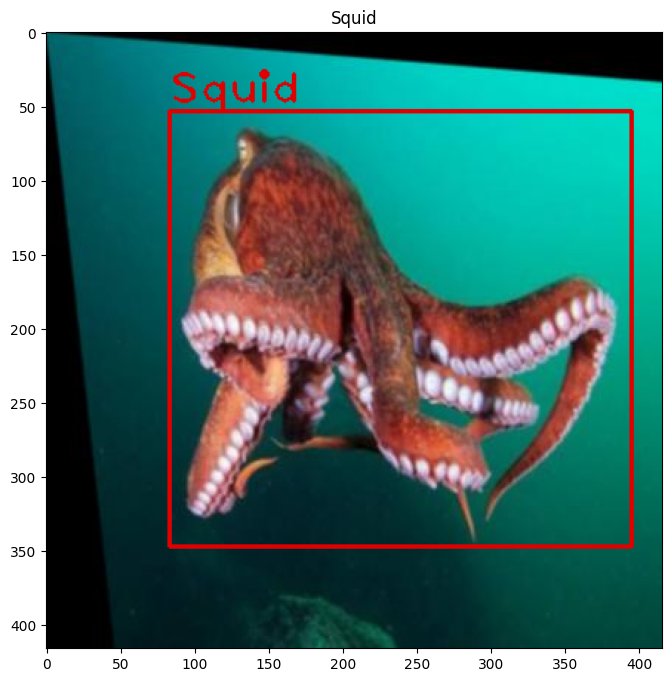

55_jpg.rf.063331fb62828cc15ec8b971641286bd.jpg

image 1/1 /content/butterfly-mix/datasets/valid/images/55_jpg.rf.063331fb62828cc15ec8b971641286bd.jpg: 640x640 1 Squid, 340.7ms
Speed: 5.1ms preprocess, 340.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
[[ 56   0 394 401]] [2]


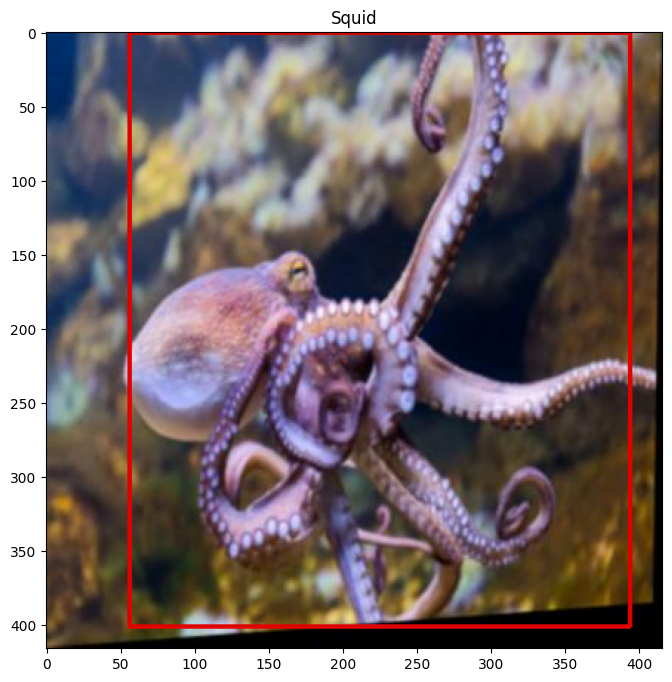

In [29]:
for filename in sorted(os.listdir(f'{HOME}/butterfly-mix/datasets/valid/images/')):
    print(filename)
    if filename.startswith("."): continue
    detect_objects(new_model2,
                   image_path = f'{HOME}/butterfly-mix/datasets/valid/images/{filename}',
                   conf = 0.5)

In [ ]:
# Working dog
from ultralytics import YOLO
import numpy as np
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np

import cv2

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

model = YOLO("yolov8m.pt")

# Define the function to perform detection on an image
def detect_objects(image_path):

    # Load the image
    image = Image.open(image_path)
    frame = cv2.cvtColor(numpy.array(image), cv2.COLOR_RGB2BGR)

    results = model(frame, device="mps")
    result = results[0]
    bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")
    classes = np.array(result.boxes.cls.cpu(), dtype="int")
    for cls, bbox in zip(classes, bboxes):
        (x, y, x2, y2) = bbox
        cv2.rectangle(frame, (x, y), (x2, y2), (0, 0, 225), 2)
        cv2.putText(frame, str(cls), (x, y - 5), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 225), 2)

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    image2 = Image.fromarray(frame_rgb)
    plt.figure(figsize=(24,32))
    plt.imshow(image2)
    plt.show()

# detect_objects('/Users/hims/Downloads/Squid Bat Butterfly.v2i.yolov8/train/images/01_jpg.rf.28abb439874a51775e1aa43db4868b56.jpg')
detect_objects('/Users/hims/Downloads/YOLO-v8-on-mac-m1/dog.png')

# cv2.destroyAllWindows()


In [ ]:
%%bash
ls -lrt
yolo mode=train task=detect model=yolov8n.pt data=/Users/hims/sjsu/sem-3/git/deep-learning/assignment/assignment-4/datasets/data.yaml epochs=3 imgsz=640 plots=True


In [ ]:
model2 = YOLO('/Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/runs/detect/train8/weights/last.pt')
model2


In [ ]:
import numpy

# Working dog
from ultralytics import YOLO
import numpy as np
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np

import cv2

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# model = YOLO('yolov8n-seg.pt')  # load a pretrained YOLOv8n segmentation model

# Define the function to perform detection on an image
def detect_objects(_model, image_path):
    # Load the image
    image = Image.open(image_path)
    frame = cv2.cvtColor(numpy.array(image), cv2.COLOR_RGB2BGR)

#     results = _model(frame, device="mps")

    results = _model.predict(source=image_path, conf=0.0055)
    result = results[0]
    print(results[0].boxes.xyxy)
    bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")
    classes = np.array(result.boxes.cls.cpu(), dtype="int")
    print(bboxes, classes)
    for cls, bbox in zip(classes, bboxes):
        (x, y, x2, y2) = bbox
        cv2.rectangle(frame, (x, y), (x2, y2), (0, 0, 225), 2)
        cv2.putText(frame, str("butterfly"), (x, y - 5), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 225), 2)

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Convert the frame to an image
    image2 = Image.fromarray(frame_rgb)
#     image2.show()
    plt.figure(figsize=(24,32))
    plt.imshow(image2)
    plt.show()

#     cv2.imshow("Img", frame)
#     cv2.waitKey(1)

detect_objects(model2, '/Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/datasets/valid/images/10_jpg.rf.2ac6e960e7c9b24df886805d273a89d3.jpg')


In [ ]:
%%bash
cd /Users/hims/sjsu/sem-3/git/deep-learning/assignment/assignment-4/datasets

pwd
yolo task=detect mode=predict model=/Users/hims/sjsu/sem-3/git/deep-learning/assignment/assignment-4/runs/detect/train8/weights/best.pt conf=0.005 source=test/images

